In [308]:
import pandas as pd    #Dataframe işlemleri için
import seaborn as sns  #Korelasyon
import matplotlib.pyplot as plt  #Görselleştirme
from sklearn.impute import SimpleImputer  #Eksik veriler olduğu takdirde doldurmak için.
from sklearn.preprocessing import LabelEncoder  #String to integer
from sklearn.model_selection import train_test_split,cross_val_score # Test train ayarlamak için.
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

# Multiple linear Regresyon
# Random Forrest  
# Decision Tree 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [309]:
df = pd.read_csv('./CAR DETAILS FROM CAR DEKHO.csv')

In [310]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [311]:
df.name.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

<AxesSubplot:ylabel='owner'>

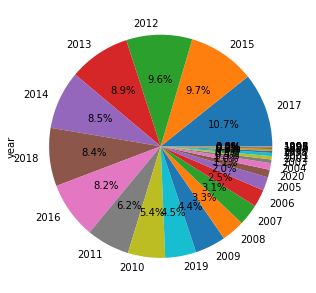

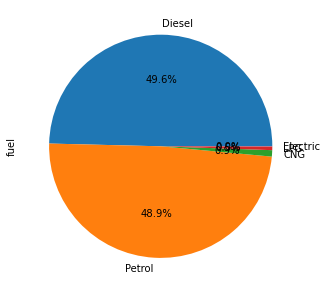

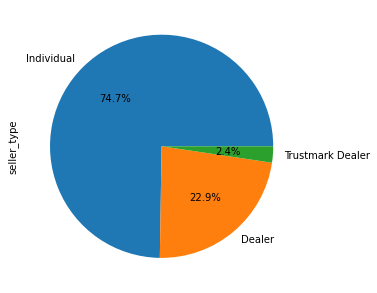

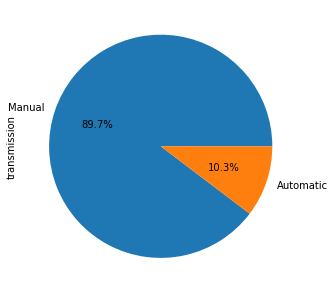

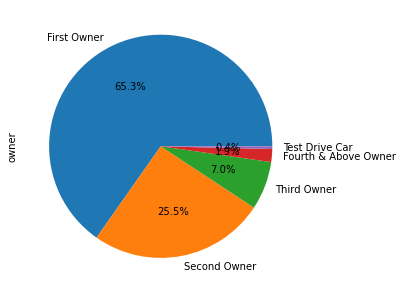

In [312]:
fig = plt.figure(figsize=(5,15))
df.year.value_counts().plot(kind= 'pie', autopct='%.1f%%')

fig = plt.figure(figsize=(5,15))
df.fuel.value_counts().plot(kind= 'pie', autopct='%.1f%%')

fig = plt.figure(figsize=(5,15))
df.seller_type.value_counts().plot(kind= 'pie', autopct='%.1f%%')

fig = plt.figure(figsize=(5,15))
df.transmission.value_counts().plot(kind= 'pie', autopct='%.1f%%')

fig = plt.figure(figsize=(5,15))
df.owner.value_counts().plot(kind= 'pie', autopct='%.1f%%')

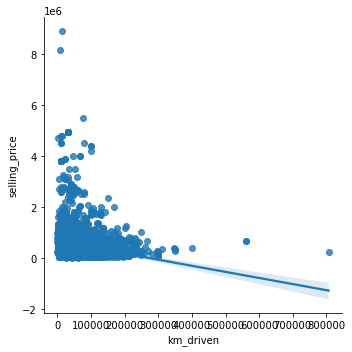

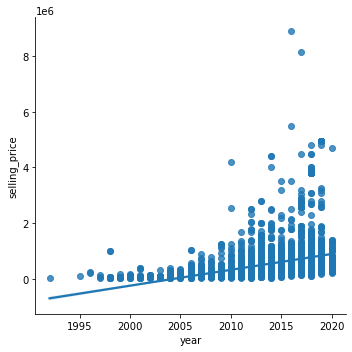

In [313]:
sns.lmplot(x='km_driven', y='selling_price', data=df)

sns.lmplot(x='year', y='selling_price', data=df)

In [271]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<AxesSubplot:xlabel='seller_type', ylabel='count'>

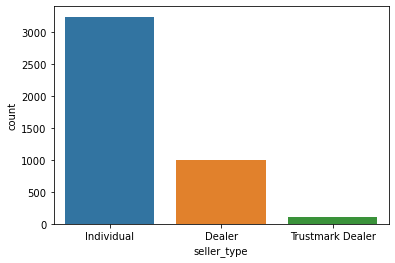

In [272]:
sns.countplot(x='seller_type', data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

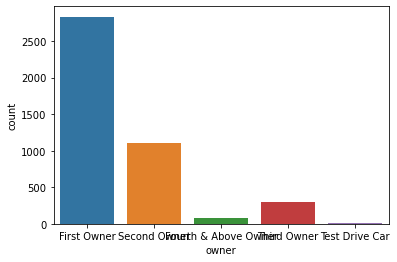

In [273]:
sns.countplot(x='owner', data=df)

<AxesSubplot:xlabel='fuel', ylabel='count'>

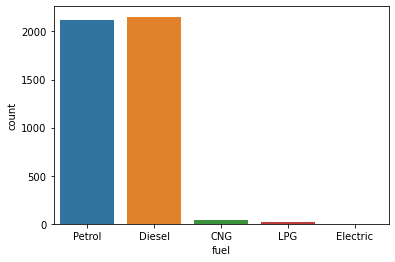

In [274]:
sns.countplot(x='fuel', data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

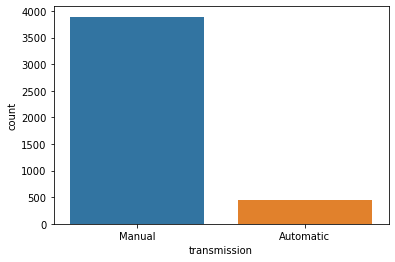

In [275]:
sns.countplot(x='transmission', data=df)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [277]:
df.shape

(4340, 8)

In [278]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [279]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [280]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [281]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [282]:
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

In [283]:
df.fuel

0       4
1       4
2       1
3       4
4       1
       ..
4335    1
4336    1
4337    4
4338    1
4339    4
Name: fuel, Length: 4340, dtype: int32

In [284]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

<AxesSubplot:>

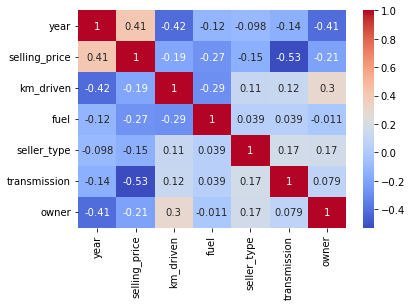

In [285]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [286]:
# Name sütunu corr analiziyle selling_price üzerinde çok etkili olmadığı için veri setinden çıkarıyorum.
df = df.drop(labels=['name'], axis=1)

In [287]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


In [288]:
# Train ve test dosyalarını ayırdım.
X, y = df.drop('selling_price', axis=1), df.selling_price

In [289]:
X_train02, X_test02, y_train02, y_test02 = train_test_split(X, y, test_size=0.2, random_state=42)

X_train03, X_test03, y_train03, y_test03 = train_test_split(X, y, test_size=0.3, random_state=42)

X_train04, X_test04, y_train04, y_test04 = train_test_split(X, y, test_size=0.4, random_state=42)

In [290]:
print(X_train02.shape)
print(X_train03.shape)
print(X_train04.shape)

(3472, 6)
(3038, 6)
(2604, 6)


In [291]:
print(X_test02.shape)
print(X_test03.shape)
print(X_test04.shape)

(868, 6)
(1302, 6)
(1736, 6)


In [292]:
print(y_train02.shape)
print(y_train03.shape)
print(y_train04.shape)

(3472,)
(3038,)
(2604,)


In [293]:
print(y_test02.shape)
print(y_test03.shape)
print(y_train04.shape)

(868,)
(1302,)
(2604,)


In [294]:
dtr02 = DecisionTreeRegressor()
dtr02.fit(X_train02, y_train02)
y_pred_dtr02 = dtr02.predict(X_test02)
dtr_result02= r2_score(y_test02, y_pred_dtr02)
dtr_adj_r2_20 = 1 - (1-dtr02.score(X_test02, y_test02))*(len(y_test02)-1)/(len(y_test02)-X_test02.shape[1]-1)


print(dtr_result02)

dtr03 = DecisionTreeRegressor()
dtr03.fit(X_train03, y_train03)
y_pred_dtr03 = dtr03.predict(X_test03)
dtr_result03= r2_score(y_test03, y_pred_dtr03)
dtr_adj_r2_30 = 1 - (1-dtr03.score(X_test03, y_test03))*(len(y_test03)-1)/(len(y_test03)-X_test03.shape[1]-1)

print(dtr_result03)

dtr04 = DecisionTreeRegressor()
dtr04.fit(X_train04, y_train04)
y_pred_dtr04 = dtr04.predict(X_test04)
dtr_result04= r2_score(y_test04, y_pred_dtr04)
dtr_adj_r2_40 = 1 - (1-dtr04.score(X_test04, y_test04))*(len(y_test04)-1)/(len(y_test04)-X_test04.shape[1]-1)

print(dtr_result04)

0.33103410107102793
0.42772167224971125
0.3418373384013216


In [295]:
reg02 = RandomForestRegressor(n_estimators=300, random_state=42)
reg02.fit(X_train02, y_train02)
y_pred_reg02 = reg02.predict(X_test02)
reg_result02 = r2_score(y_test02, y_pred_reg02)
reg_adj_r2_20 = 1 - (1-reg02.score(X_test02, y_test02))*(len(y_test02)-1)/(len(y_test02)-X_test02.shape[1]-1)
print('%20 Test Size Random Forest Regression Adjusted R2 Score Is: {}'.format(reg_adj_r2_20))

reg03 = RandomForestRegressor(n_estimators=300, random_state=42)
reg03.fit(X_train03, y_train03)
y_pred_reg03 = reg03.predict(X_test03)
reg_result03 = r2_score(y_test03, y_pred_reg03)
reg_adj_r2_30 = 1 - (1-reg03.score(X_test03, y_test03))*(len(y_test03)-1)/(len(y_test03)-X_test03.shape[1]-1)
print('%30 Test Size Random Forest Regression Adjusted R2 Score Is: {}'.format(reg_adj_r2_30))

reg04 = RandomForestRegressor(n_estimators=300, random_state=42)
reg04.fit(X_train04, y_train04)
y_pred_reg04 = reg04.predict(X_test04)
reg_result04 = r2_score(y_test04, y_pred_reg04)
reg_adj_r2_40 = 1 - (1-reg04.score(X_test04, y_test04))*(len(y_test04)-1)/(len(y_test04)-X_test04.shape[1]-1)
print('%40 Test Size Random Forest Regression Adjusted R2 Score Is: {}'.format(reg_adj_r2_40))

%20 Test Size Random Forest Regression Adjusted R2 Score Is: 0.4971625773335858
%30 Test Size Random Forest Regression Adjusted R2 Score Is: 0.5231467639012947
%40 Test Size Random Forest Regression Adjusted R2 Score Is: 0.5599261248514782


In [296]:
multi_reg02 = LinearRegression()
multi_reg02.fit(X_train02, y_train02)
y_pred_multi_reg02 = multi_reg02.predict(X_test02)
multi_reg_result02 = r2_score(y_test02, y_pred_multi_reg02)
mreg_adj_r2_20 = 1 - (1-multi_reg02.score(X_test02, y_test02))*(len(y_test02)-1)/(len(y_test02)-X_test02.shape[1]-1)
print('%20 Test Size Linear Regression Adjusted R2 Score Is {}'.format(mreg_adj_r2_20))

multi_reg03 = LinearRegression()
multi_reg03.fit(X_train03, y_train03)
y_pred_multi_reg03 = multi_reg03.predict(X_test03)
multi_reg_result03 = r2_score(y_test03, y_pred_multi_reg03)
mreg_adj_r2_30 = 1 - (1-multi_reg03.score(X_test03, y_test03))*(len(y_test03)-1)/(len(y_test03)-X_test03.shape[1]-1)
print('%30 Test Size Linear Regression Adjusted R2 Score Is {}'.format(mreg_adj_r2_30))


multi_reg04 = LinearRegression()
multi_reg04.fit(X_train04, y_train04)
y_pred_multi_reg04 = multi_reg04.predict(X_test04)
multi_reg_result04 = r2_score(y_test04, y_pred_multi_reg04)
mreg_adj_r2_40 = 1 - (1-multi_reg04.score(X_test04, y_test04))*(len(y_test04)-1)/(len(y_test04)-X_test04.shape[1]-1)
print('%40 Test Size Linear Regression Adjusted R2 Score Is {}'.format(mreg_adj_r2_40))

%20 Test Size Linear Regression Adjusted R2 Score Is 0.3896771654980008
%30 Test Size Linear Regression Adjusted R2 Score Is 0.4348751537761504
%40 Test Size Linear Regression Adjusted R2 Score Is 0.43749494764959207


In [299]:
scores2 = cross_val_score(dtr02, X,y,cv=5)
scores3 = cross_val_score(reg04, X,y,cv=5)
scores4  = cross_val_score(multi_reg04, X,y,cv=5)

In [300]:
scores2.mean()

#Decision Tree algoritmasına cross validation uygulanarak alınan değerlerin ortalamasının verdiği uygunluk.

0.509531084956285

In [301]:
scores3.mean()

#Random Forest algoritmasına cross validation uygulanarak alınan değerlerin ortalamasının verdiği uygunluk.

0.6386698128557825

In [302]:
scores4.mean()

#lineer Regresyon algoritmasına cross validation uygulanarak alınan değerlerin ortalamasının verdiği uygunluk.

0.4288055172173671

In [303]:
pd.DataFrame({'%20':['Decision Tree Regressor','Random Forest Regressor', 'Linear Regressor'],
             'Adjusted R2 Score':[dtr_adj_r2_20,reg_adj_r2_20,mreg_adj_r2_20]})

,%20,Adjusted R2 Score
0,Decision Tree Regressor,0.326372
1,Random Forest Regressor,0.497163
2,Linear Regressor,0.389677


In [304]:
pd.DataFrame({'%30':['Decision Tree Regressor','Random Forest Regressor', 'Linear Regressor'],
             'R^2 Scores':[dtr_adj_r2_30,reg_adj_r2_30,mreg_adj_r2_30]})

,%30,R^2 Scores
0,Decision Tree Regressor,0.425070
1,Random Forest Regressor,0.523147
2,Linear Regressor,0.434875


In [305]:
pd.DataFrame({'%40':['Decision Tree Regressor','Random Forest Regressor', 'Linear Regressor'],
             'R^2 Scores':[dtr_adj_r2_40,reg_adj_r2_40,mreg_adj_r2_40]})

,%40,R^2 Scores
0,Decision Tree Regressor,0.339553
1,Random Forest Regressor,0.559926
2,Linear Regressor,0.437495


In [306]:
pd.DataFrame({'Cross Validation':['Decision Tree Regressor','Random Forest Regressor', 'Linear Regressor'],
             'Mean Score':[scores2.mean(),scores3.mean(),scores4.mean()]})

,Cross Validation,Mean Score
0,Decision Tree Regressor,0.509531
1,Random Forest Regressor,0.638670
2,Linear Regressor,0.428806


In [307]:
# Random Forest Regressor en iyi sonucu verir.